<a href="https://colab.research.google.com/github/dqminhv/fraudulent-job-posting-detection-with-NLP/blob/main/notebook/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages and data**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
job_posting_us_df = pd.read_csv('https://raw.githubusercontent.com/dqminhv/fraudulent-job-posting-detection-with-NLP/main/Data/job-posting-us.csv')

# **Target variable**

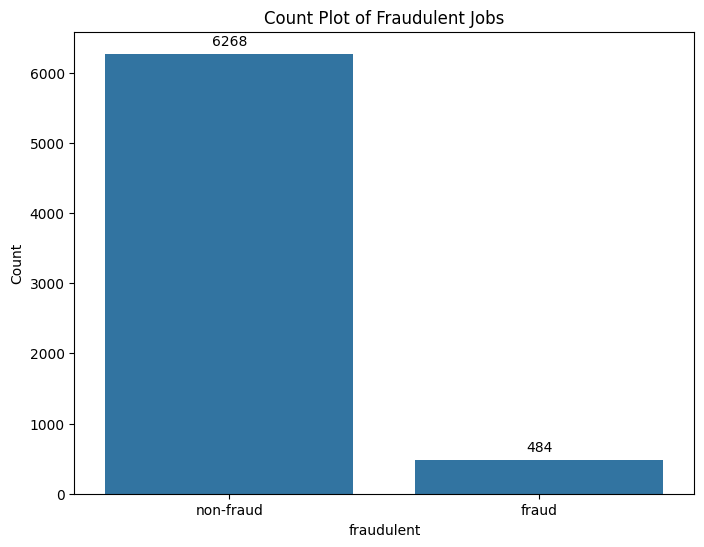

In [11]:
#Create a count plot of the target varible
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fraudulent', data=job_posting_us_df)

# Display count values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
ax.set_xticks([0,1])
ax.set_xticklabels(['non-fraud', 'fraud'])
plt.title("Count Plot of Fraudulent Jobs")
plt.ylabel("Count")
plt.show()

In [9]:
print('Percentage of non-fraudulent job postings: {:.2f}'.format(job_posting_us_df['fraudulent'].value_counts(normalize=True)[0]*100))
print('Percentage of fraudulent job postings: {:.2f}'.format(job_posting_us_df['fraudulent'].value_counts(normalize=True)[1]*100))

Percentage of non-fraudulent job postings: 92.83
Percentage of fraudulent job postings: 7.17


**The target variable exhibits significant imbalance, which we will consider during the construction of the classification model.**

# **Features**

In [12]:
job_posting_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6752 entries, 0 to 6751
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                6752 non-null   object
 1   location             6752 non-null   object
 2   department           6751 non-null   object
 3   salary_range         6752 non-null   object
 4   company_profile      6752 non-null   object
 5   description          6752 non-null   object
 6   requirements         6752 non-null   object
 7   benefits             6752 non-null   object
 8   telecommuting        6752 non-null   int64 
 9   has_company_logo     6752 non-null   int64 
 10  has_questions        6752 non-null   int64 
 11  employment_type      6752 non-null   object
 12  required_experience  6752 non-null   object
 13  required_education   6752 non-null   object
 14  industry             6752 non-null   object
 15  function             6752 non-null   object
 16  fraudu

In [14]:
#We split the features into two types: numerical and categorical features

#Numerical features
num_fea = ['telecommuting', 'has_company_logo', 'has_questions']

#Categorical features
cat_fea = (job_posting_us_df.columns.drop(num_fea)).drop('fraudulent')

## **Numerical features**

Numerical features includes:


*   telecommuting
*   has_company_logo
*   has_questions



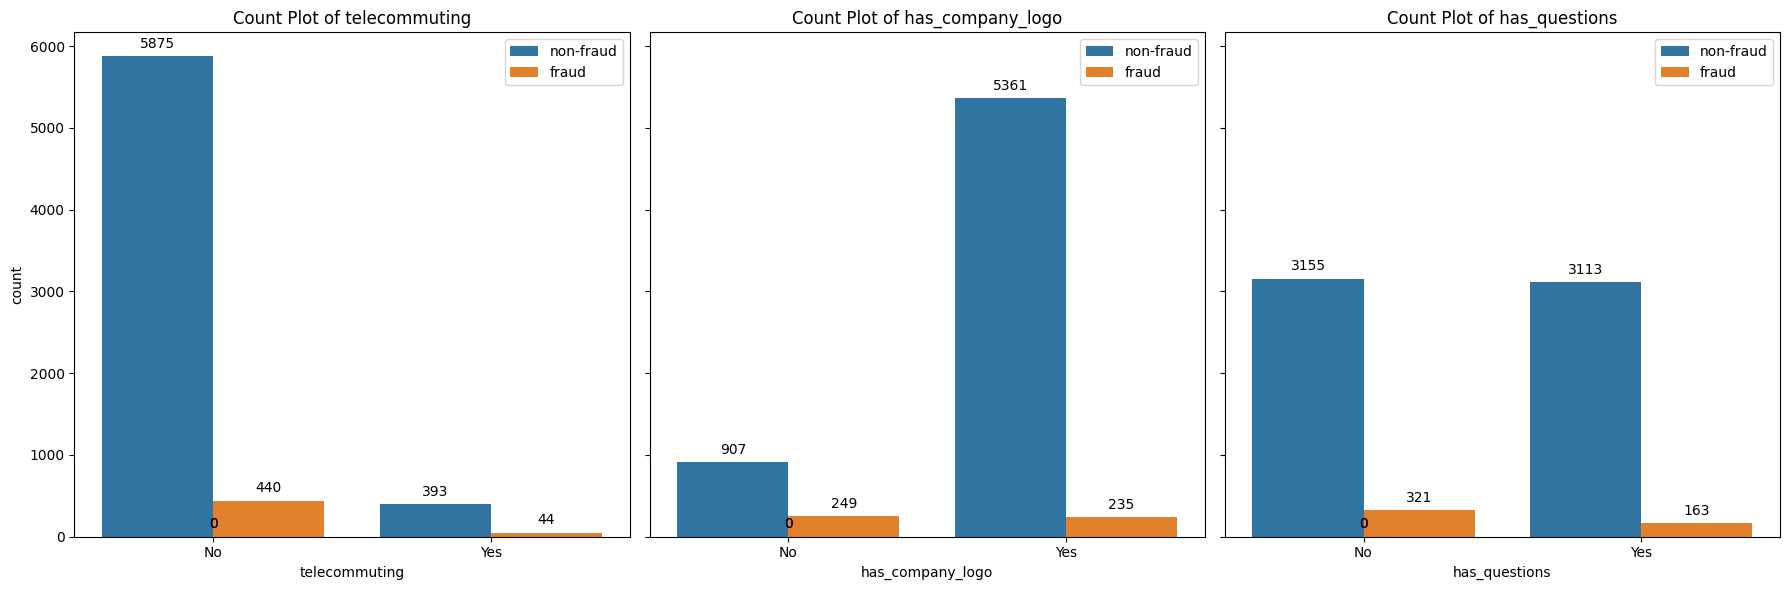

In [16]:
#Create a count plot for each feature,
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 1 row, 3 columns
plot = 0
for fea in num_fea:
  ax = sns.countplot(x=fea, data=job_posting_us_df, hue='fraudulent', ax=axes[plot])
  # Display count values on top of the bars
  for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0, 9),
                  textcoords = 'offset points')
  ax.set_xticks([0,1])
  ax.set_xticklabels(['No', 'Yes'])
  axes[plot].set_title("Count Plot of {}".format(fea))
  axes[plot].set_xlabel(fea)
  axes[plot].legend(labels=['non-fraud', 'fraud'])
  plot += 1
plt.tight_layout()
plt.show()

**We conduct hypothesis testing to examine the association between telecommuting, company logo presence, and inclusion of questions in job postings with the target variable, fraudulent status.**

1. telecommuting

* **Null hypothesis: There is NO significant difference in target variable distribution between records with and without telecommuting work.**

* **Alt. hypothesis: There IS significant difference in target variable distribution between records with and without telecommuting work**

In [23]:
contingency_table = pd.crosstab(job_posting_us_df['telecommuting'], job_posting_us_df['fraudulent'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Feature: telecommuting, p-value: {p_value}")

# If p-value is less than significance level (e.g., 0.05), reject null hypothesis
if p_value <= 0.05:
  print(f"Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without telecommuting work.")
else:
  print(f"Fail to reject null hypothesis for telecommuting feature: There is no significant difference in target variable distribution between records with and without telecommuting work.")

Feature: telecommuting, p-value: 0.019569354077958512
Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without telecommuting work.


2. has_company_logo

* **Null hypothesis: There is NO significant difference in target variable distribution between records with and without company logo.**

* **Alt. hypothesis: There IS significant difference in target variable distribution between records with and without company logo.**

In [24]:
contingency_table = pd.crosstab(job_posting_us_df['has_company_logo'], job_posting_us_df['fraudulent'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Feature: has_company_logo, p-value: {p_value}")

# If p-value is less than significance level (e.g., 0.05), reject null hypothesis
if p_value <= 0.05:
  print(f"Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without company logo.")
else:
  print(f"Fail to reject null hypothesis for telecommuting feature: There is no significant difference in target variable distribution between records with and without company logo.")

Feature: has_company_logo, p-value: 1.3840036546810095e-95
Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without company logo.


3. has_questions

* **Null hypothesis: There is NO significant difference in target variable distribution between records with and without questions.**

* **Alt. hypothesis: There IS significant difference in target variable distribution between records with and without questions.**

In [26]:
contingency_table = pd.crosstab(job_posting_us_df['has_questions'], job_posting_us_df['fraudulent'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Feature: has_questions, p-value: {p_value}")

# If p-value is less than significance level (e.g., 0.05), reject null hypothesis
if p_value <= 0.05:
  print(f"Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without questions.")
else:
  print(f"Fail to reject null hypothesis for telecommuting feature: There is no significant difference in target variable distribution between records with and without questions.")

Feature: has_questions, p-value: 1.657766139664112e-11
Reject null hypothesis for telecommuting feature: There is a significant difference in target variable distribution between records with and without questions.
